In [39]:
from GameEnvironment import ModelGameEnvironment
import torch
from ActorCritic import ActorCritic, Actor, Critic
import pandas as pd

In [40]:
game = ModelGameEnvironment(.5, 2, 10)

In [41]:
game.reset()


(tensor([0., 0.]), None, False)

In [42]:
print(game.step(torch.Tensor([10,10]) ))
print(f"quantity history {game.demand}")
print(f"profit history {game.profit}")

(tensor([10., 10.]), tensor([950., 950.]), False)
quantity history 100
profit history tensor([[950.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [950.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])


In [43]:
##################################
# Independent Learning Algorithm #
##################################

env = ModelGameEnvironment(.5, 2, 20)

# Initialize actor and critic
input_dim = 2


# Initialize actor-critic algorithm
agent1 = ActorCritic(Actor(input_dim), 
                    Critic(input_dim), .95)


agent2 = ActorCritic(Actor(input_dim), 
                    Critic(input_dim), .95)

reward_memory = dict()

# Training loop
num_episodes = 100
for episode in range(num_episodes):
    total_reward_agent1 = 0
    total_reward_agent2 = 0
    state, _, done = env.reset()

    
    while not done:
        action_profile = torch.Tensor(2)
        log_probs = []


        
        action1, log_prob1 = agent1.sample_action(state)
        action_profile[0] = action1


        action2, log_prob2 = agent2.sample_action(state)
        action_profile[1] = action2
        log_probs.append([log_prob1,log_prob2])        
        
        # Compute reward based on the action profile
        next_state, reward_tensor, done = env.step(action_profile)
        #print(f"next state: {next_state}, reward_tensor: {reward_tensor}, done: {done}")
        reward = torch.sum(reward_tensor).item()

        #for i in range(2):
        agent1.update(state,  reward_tensor[0], log_probs[0][0], next_state)
        total_reward_agent1 += reward_tensor[0]
        agent2.update(state,  reward_tensor[1], log_probs[0][1], next_state)        
        total_reward_agent2 += reward_tensor[1]

    #if episode % 10 == 0:
        
    #print(f"Episode {episode} complete")
    #print(total_reward_agent1,total_reward_agent2)
    reward_memory[f"{episode}"] = {"agent 1": total_reward_agent1.item(), "agent 2": total_reward_agent2.item()}

pd.DataFrame(reward_memory).T

/Users/pacoaristi/Desktop/Github ferdos/EquiLearn_Sberg/classes/ActorCritic.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reward = torch.tensor(reward, dtype=torch.float32, device=self.device)


,agent 1,agent 2
0,1421.793335,1362.135742
1,2830.999268,1796.453247
2,4070.042969,2684.359863
3,5385.800781,3031.718994
4,7555.967285,4726.441895
...,...,...
95,30878.271484,30808.105469
96,30761.945312,30788.539062
97,31042.693359,30778.632812
98,31131.136719,30787.298828


<Axes: title={'center': 'Accumulated Profits'}>

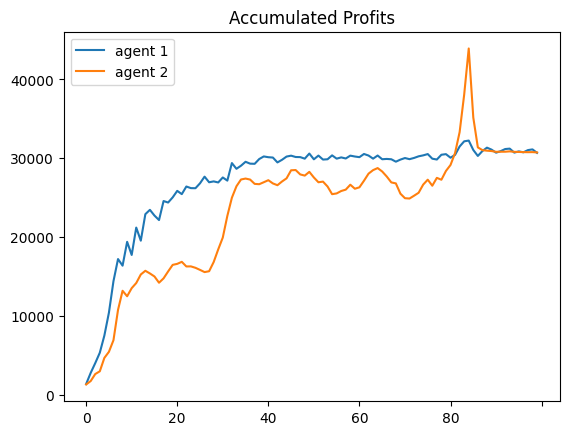

In [44]:
pd.DataFrame(reward_memory).T.plot(title = "Accumulated Profits")


<Axes: title={'center': 'Prices last game'}>

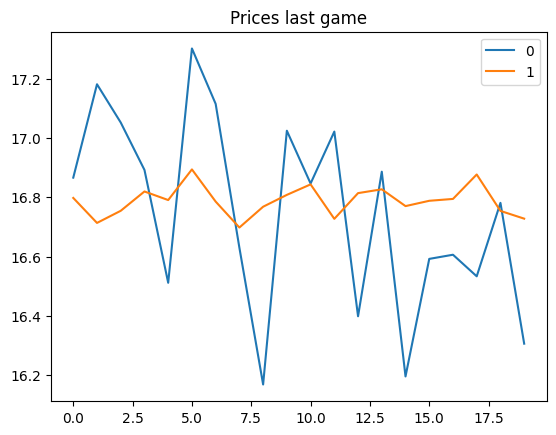

In [45]:
pd.DataFrame(env.price).T.plot(title = "Prices last game")

<Axes: title={'center': 'Profits last game'}>

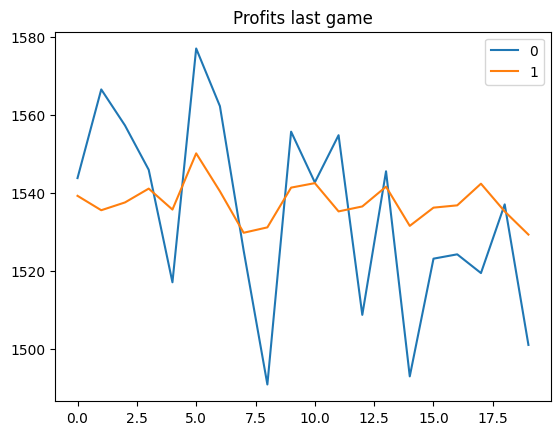

In [46]:
pd.DataFrame(env.profit).T.plot(title = "Profits last game")